In [1]:
# import library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# load cleaned data
fd = pd.read_excel("https://github.com/20JUNE22/capstone2023/raw/main/clean_data.xlsx")
 
fd

,EastofUS,Urban,LowIncomeTracts,PCTGQTRS,PovertyRate,MedianFamilyIncome,TractKids,TractSeniors,TractWhite,TractBlack,...,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,1,0,0.00,11.3,81250,507,221,1622,217,...,2.346353,3.210319,2.338456,1.176091,0.000000,1.176091,1.662758,1.653213,0.845098,2.012837
1,1,1,1,8.34,17.9,49000,606,214,888,1217,...,2.332438,2.948902,3.085647,0.778151,0.000000,0.778151,1.748188,1.880814,1.954243,2.195900
2,1,1,0,0.00,15.0,62609,894,439,2576,647,...,2.643453,3.411114,2.811575,1.255273,0.778151,1.079181,2.071882,1.944483,2.000000,2.238046
3,1,1,0,0.00,2.8,70607,1015,904,4086,193,...,2.956649,3.611405,2.287802,1.278754,0.698970,1.079181,1.875061,1.934498,1.342423,1.995635
4,1,1,0,1.68,15.2,96334,3162,1126,8666,1437,...,3.051924,3.937869,3.157759,2.472756,1.000000,1.690196,2.492760,2.551450,2.363612,2.531479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71756,0,0,0,1.71,9.7,67254,884,593,3106,6,...,2.773786,3.492341,0.845098,1.204120,0.000000,1.447158,2.238046,2.491362,1.792392,1.812913
71757,0,1,0,0.38,11.6,64152,674,399,2377,5,...,2.602060,3.376212,0.778151,1.380211,0.000000,1.612784,2.344392,2.650308,1.949390,1.623249
71758,0,1,0,2.87,16.3,69605,614,516,2312,11,...,2.713491,3.364176,1.079181,1.041393,0.301030,1.431364,2.262451,2.610660,1.380211,1.812913
71759,0,0,0,7.60,17.5,74500,655,499,3179,15,...,2.698970,3.502427,1.204120,1.041393,0.301030,1.681241,1.799341,1.963788,1.681241,1.544068


In [4]:
# drop the irrelevant inputs
us = fd.drop(fd.columns[3:17], axis=1)

us.head()

,EastofUS,Urban,LowIncomeTracts,FoodDesert,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,1,0,1,0.000000,1.089905,4.896262,2.705864,2.346353,3.210319,2.338456,1.176091,0.000000,1.176091,1.662758,1.653213,0.845098,2.012837
1,1,1,1,1,0.970347,1.276462,4.667472,2.783189,2.332438,2.948902,3.085647,0.778151,0.000000,0.778151,1.748188,1.880814,1.954243,2.195900
2,1,1,0,1,0.000000,1.204120,4.778954,2.951823,2.643453,3.411114,2.811575,1.255273,0.778151,1.079181,2.071882,1.944483,2.000000,2.238046
3,1,1,0,1,0.000000,0.579784,4.833205,3.006894,2.956649,3.611405,2.287802,1.278754,0.698970,1.079181,1.875061,1.934498,1.342423,1.995635
4,1,1,0,1,0.428135,1.209515,4.972369,3.500099,3.051924,3.937869,3.157759,2.472756,1.000000,1.690196,2.492760,2.551450,2.363612,2.531479


In [5]:
# divided 'US' data into the independent and dependent variables
X = us.drop(['FoodDesert'], axis=1) # all independent
y = us['FoodDesert'] # target

X.head()

,EastofUS,Urban,LowIncomeTracts,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,1,0,0.000000,1.089905,4.896262,2.705864,2.346353,3.210319,2.338456,1.176091,0.000000,1.176091,1.662758,1.653213,0.845098,2.012837
1,1,1,1,0.970347,1.276462,4.667472,2.783189,2.332438,2.948902,3.085647,0.778151,0.000000,0.778151,1.748188,1.880814,1.954243,2.195900
2,1,1,0,0.000000,1.204120,4.778954,2.951823,2.643453,3.411114,2.811575,1.255273,0.778151,1.079181,2.071882,1.944483,2.000000,2.238046
3,1,1,0,0.000000,0.579784,4.833205,3.006894,2.956649,3.611405,2.287802,1.278754,0.698970,1.079181,1.875061,1.934498,1.342423,1.995635
4,1,1,0,0.428135,1.209515,4.972369,3.500099,3.051924,3.937869,3.157759,2.472756,1.000000,1.690196,2.492760,2.551450,2.363612,2.531479


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load your data and split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the models you want to compare
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=123)),
    ('Decision Tree', DecisionTreeClassifier(random_state=123)),
    ('Random Forest', RandomForestClassifier(random_state=123)),
    ('XGBoost', XGBClassifier(random_state=123)),
    ('LightGBM', LGBMClassifier(random_state=123)),
    ('SVM', SVC(random_state=123)),
    ('KNN', KNeighborsClassifier())
]

# Train and evaluate each model
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance using common metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print the model's performance metrics
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print()

Logistic Regression Results:
Accuracy: 0.742
Precision: 0.685
Recall: 0.582
F1 Score: 0.629

Decision Tree Results:
Accuracy: 0.678
Precision: 0.569
Recall: 0.589
F1 Score: 0.579

Random Forest Results:
Accuracy: 0.763
Precision: 0.716
Recall: 0.615
F1 Score: 0.662

XGBoost Results:
Accuracy: 0.757
Precision: 0.694
Recall: 0.631
F1 Score: 0.661

LightGBM Results:
Accuracy: 0.763
Precision: 0.707
Recall: 0.630
F1 Score: 0.666

SVM Results:
Accuracy: 0.757
Precision: 0.697
Recall: 0.624
F1 Score: 0.659

KNN Results:
Accuracy: 0.723
Precision: 0.641
Recall: 0.601
F1 Score: 0.620



## Base Model 1

In [7]:


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the Random Forest model
rf_base= RandomForestClassifier(n_estimators=100, random_state=123)

# Fit the model to the training data
rf_base.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_base.predict(X_test)
    
# Evaluate the model's performance using common metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
# Print the model's performance metrics
print(f"The baseline model Results:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

The baseline model Results:
Accuracy: 0.763
Precision: 0.716
Recall: 0.615
F1 Score: 0.662


## Feature Importance

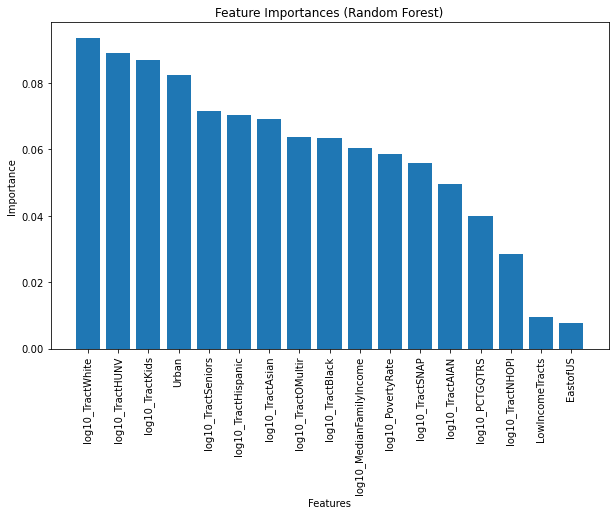

In [9]:
import matplotlib.pyplot as plt

# Obtain feature importances
importances = rf_base.feature_importances_

# Get the feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.show()


In [11]:
from sklearn.metrics import accuracy_score

# Initialize an empty list to store accuracies
accuracies_rf = []

# Iterate over each feature
for i in range(X.shape[1]):
    # Create a new dataset without the i-th feature
    X_removed = X.drop(X.columns[i], axis=1)
    
    # Split the new dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_removed, y, test_size=0.2, random_state=123)
    
    # Create a new Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
    
    # Fit the model to the training data
    rf_model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = rf_model.predict(X_test)
    
    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_rf.append(accuracy)

# Print the accuracies for each feature removal
for i, feature in enumerate(X.columns):
    print(f"Accuracy without {feature}: {accuracies_rf[i]:.3f}")


Accuracy without EastofUS: 0.761
Accuracy without Urban: 0.692
Accuracy without LowIncomeTracts: 0.763
Accuracy without log10_PCTGQTRS: 0.759
Accuracy without log10_PovertyRate: 0.762
Accuracy without log10_MedianFamilyIncome: 0.761
Accuracy without log10_TractKids: 0.756
Accuracy without log10_TractSeniors: 0.754
Accuracy without log10_TractWhite: 0.760
Accuracy without log10_TractBlack: 0.761
Accuracy without log10_TractAsian: 0.757
Accuracy without log10_TractNHOPI: 0.761
Accuracy without log10_TractAIAN: 0.762
Accuracy without log10_TractOMultir: 0.761
Accuracy without log10_TractHispanic: 0.757
Accuracy without log10_TractHUNV: 0.754
Accuracy without log10_TractSNAP: 0.760


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Select features for Random Forest
rf_selected_features = ['log10_TractKids','log10_TractHUNV','log10_TractWhite','log10_TractSeniors','log10_TractAsian'
                       ,'log10_TractHispanic','Urban','log10_TractBlack','log10_TractSNAP']

# Select features for LightGBM
lgbm_selected_features = ['log10_TractHUNV','log10_TractWhite','log10_TractSeniors'
                       ,'log10_TractSNAP','log10_TractHispanic','log10_TractOMultir','log10_TractAIAN','log10_TractNHOPI',
                         'log10_TractAsian','log10_TractBlack','log10_TractKids','log10_MedianFamilyIncome','log10_PovertyRate'
                         ,'log10_PCTGQTRS','Urban','EastofUS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Random Forest
rf_selected_model = RandomForestClassifier()
rf_selected_model.fit(X_train[rf_selected_features], y_train)
rf_predictions = rf_selected_model.predict(X_test[rf_selected_features])
rf_accuracy = accuracy_score(y_test, rf_predictions)

# LightGBM
lgbm_selected_model = LGBMClassifier()
lgbm_selected_model.fit(X_train[lgbm_selected_features], y_train)
lgbm_predictions = lgbm_selected_model.predict(X_test[lgbm_selected_features])
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)

# Print the results
print("Random Forest Accuracy:", rf_accuracy)
print("LightGBM Accuracy:", lgbm_accuracy)


Random Forest Accuracy: 0.7577509928237999
LightGBM Accuracy: 0.663624329408486


In [16]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)

# Create RFECV object with Random Forest classifier
rfecv = RFECV(estimator=rf_model, cv=5, scoring='accuracy')

# Fit RFECV on the training data
rfecv.fit(X_train, y_train)

# Print the optimal number of features
print("Optimal number of features: ", rfecv.n_features_)

# Get the selected features
selected_features_rf = X_train.columns[rfecv.support_]
print("Selected features: ", selected_features_rf)


Optimal number of features:  17
Selected features:  Index(['EastofUS', 'Urban', 'LowIncomeTracts', 'log10_PCTGQTRS',
       'log10_PovertyRate', 'log10_MedianFamilyIncome', 'log10_TractKids',
       'log10_TractSeniors', 'log10_TractWhite', 'log10_TractBlack',
       'log10_TractAsian', 'log10_TractNHOPI', 'log10_TractAIAN',
       'log10_TractOMultir', 'log10_TractHispanic', 'log10_TractHUNV',
       'log10_TractSNAP'],
      dtype='object')


* Model 1 has optimal number of features is 17 (all features).
* The feature importance of each feature is very small and feature selection may not have a significant impact on improving the model's performance.

## Hyperparameter Tuning

### Full model

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=123)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train[rf_selected_features], y_train)


# Use the best model to make predictions
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)


Best Model Accuracy: 0.7641608026196614


In [20]:
#pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.ensemble import RandomForestClassifier
import joblib



# Fit the best model on the training data
best_model.fit(X_train[rf_selected_features], y_train)

# Save the best model to a file
joblib.dump(best_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

### Reduced Model

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib

# Select features for Random Forest
rf_selected_features = ['log10_TractKids', 'log10_TractHUNV', 'log10_TractWhite', 'log10_TractSeniors', 'log10_TractAsian', 'log10_TractHispanic', 'Urban', 'log10_TractBlack', 'log10_TractSNAP']

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=123)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train[rf_selected_features], y_train)

# Get the best tuned model
best_model = grid_search.best_estimator_

# Save the tuned model to a file
joblib.dump(best_model, 'random_forest_tuned_model.pkl')


['random_forest_tuned_model.pkl']

In [31]:
# Make predictions on the test set
y_pred = best_model.predict(X_test[rf_selected_features])

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Tuned Random Forest Accuracy:", accuracy)

Tuned Random Forest Accuracy: 0.7618616317146241


### Compare performance

In [39]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score
import joblib

# Load the saved models
random_forest_model = joblib.load('random_forest_model.pkl')
random_forest_tuned_model = joblib.load('random_forest_tuned_model.pkl')

# Fit the models on the training data
random_forest_model.fit(X_train, y_train)
random_forest_tuned_model.fit(X_train[rf_selected_features], y_train)

# Evaluate the performance of the random_forest_model
start_time = time.time()
y_pred_rf = random_forest_model.predict(X_test)
end_time = time.time()

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
runtime_rf = end_time - start_time

# Evaluate the performance of the random_forest_tuned_model
start_time = time.time()
y_pred_best = random_forest_tuned_model.predict(X_test[rf_selected_features])
end_time = time.time()

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
runtime_best = end_time - start_time

# Print the performance metrics
print("Random Forest Model:")
print(f"Accuracy: {accuracy_rf:.3f}")
print(f"Precision: {precision_rf:.3f}")
print(f"Recall: {recall_rf:.3f}")
print(f"Runtime: {runtime_rf:.3f} seconds")

print("\nTuned Random Forest Model:")
print(f"Accuracy: {accuracy_best:.3f}")
print(f"Precision: {precision_best:.3f}")
print(f"Recall: {recall_best:.3f}")
print(f"Runtime: {runtime_best:.3f} seconds")


Random Forest Model:
Accuracy: 0.762
Precision: 0.719
Recall: 0.604
Runtime: 1.052 seconds

Tuned Random Forest Model:
Accuracy: 0.762
Precision: 0.714
Recall: 0.612
Runtime: 1.203 seconds


## Validation

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create the random forest model with tuned hyperparameters
random_forest_tuned_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=123)

# Perform k-Fold Cross-Validation
k = 5  # Number of folds
scoring = 'accuracy'  # Scoring metric

# Use cross_val_score to perform k-fold cross-validation
scores = cross_val_score(random_forest_tuned_model, X_train, y_train, cv=k, scoring=scoring)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())


Cross-Validation Scores: [0.75535621 0.75962376 0.74838878 0.75742531 0.74967337]
Mean Accuracy: 0.7540934871744431
Standard Deviation: 0.004367161281963517


* Overall, the cross-validation results suggest that the random_forest_tuned_model has an average accuracy of approximately 0.75 with relatively low variability across the folds. 
* It indicates that the model is performing consistently and reliably across different subsets of the training data.

Accuracy: 0.7618616317146241


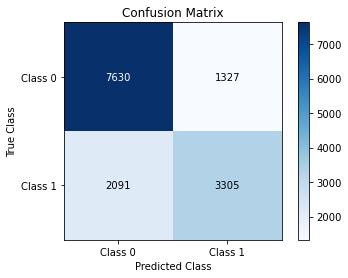

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Class 0', 'Class 1']  # Replace with your class labels
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2

# Display the numbers inside the confusion matrix plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


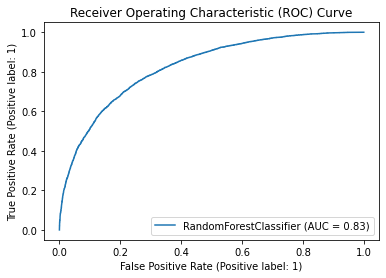

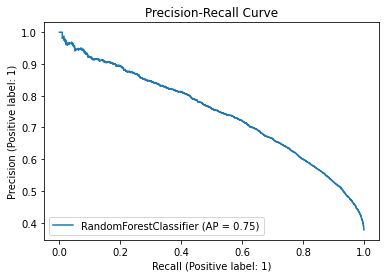

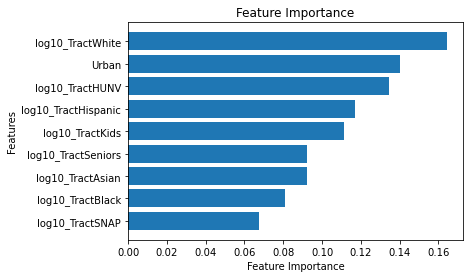

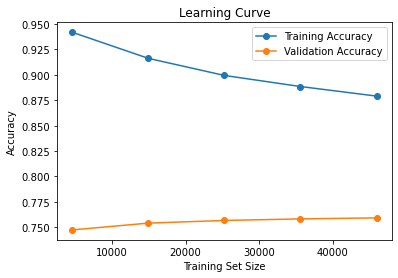

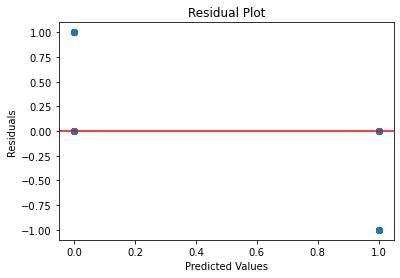

In [47]:
from sklearn.metrics import plot_roc_curve, precision_recall_curve, plot_precision_recall_curve
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import learning_curve, cross_val_predict, cross_val_score, KFold, train_test_split

# ROC Curve
plot_roc_curve(best_model, X_test[rf_selected_features], y_test)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Precision-Recall Curve
plot_precision_recall_curve(best_model, X_test[rf_selected_features], y_test)
plt.title('Precision-Recall Curve')
plt.show()

# Feature Importance
feature_importance = best_model.feature_importances_
sorted_indices = np.argsort(feature_importance)
sorted_features = np.array(rf_selected_features)[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train[rf_selected_features], y_train, cv=5, scoring='accuracy')
mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)

plt.plot(train_sizes, mean_train_scores, 'o-', label='Training Accuracy')
plt.plot(train_sizes, mean_test_scores, 'o-', label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Residual Plot
kfold = KFold(n_splits=5, shuffle=True, random_state=123)
y_pred_cv = cross_val_predict(best_model, X_train[rf_selected_features], y_train, cv=kfold)

residuals = y_train - y_pred_cv
plt.scatter(y_pred_cv, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


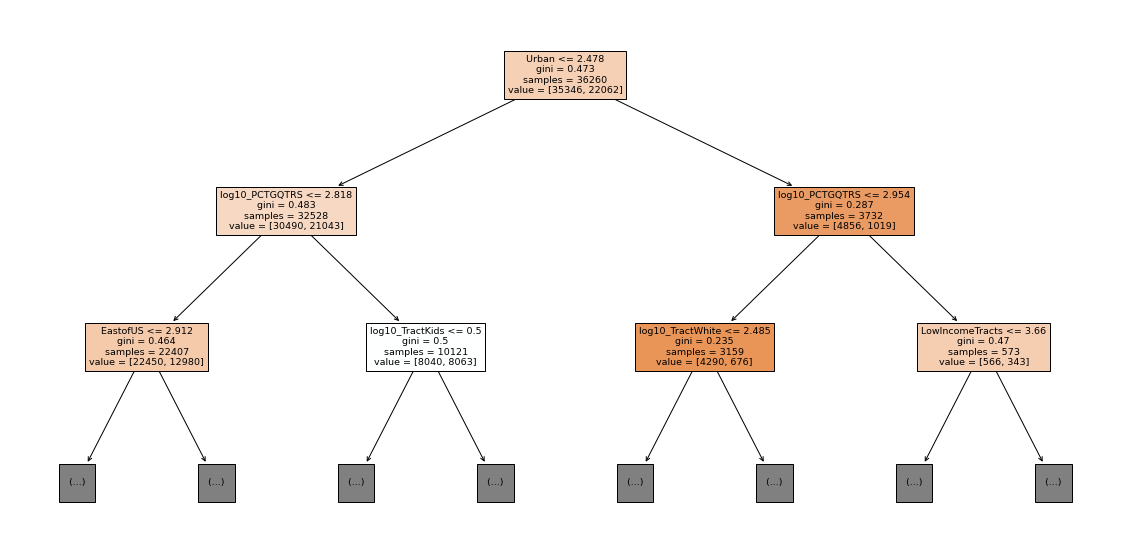

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the saved Random Forest model
random_forest_model = joblib.load('random_forest_tuned_model.pkl')

# Get one of the decision trees from the forest
tree_to_plot = random_forest_model.estimators_[5]

# Plot the tree with limited depth
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_to_plot, filled=True, feature_names=X_train.columns, max_depth=2)
plt.show()


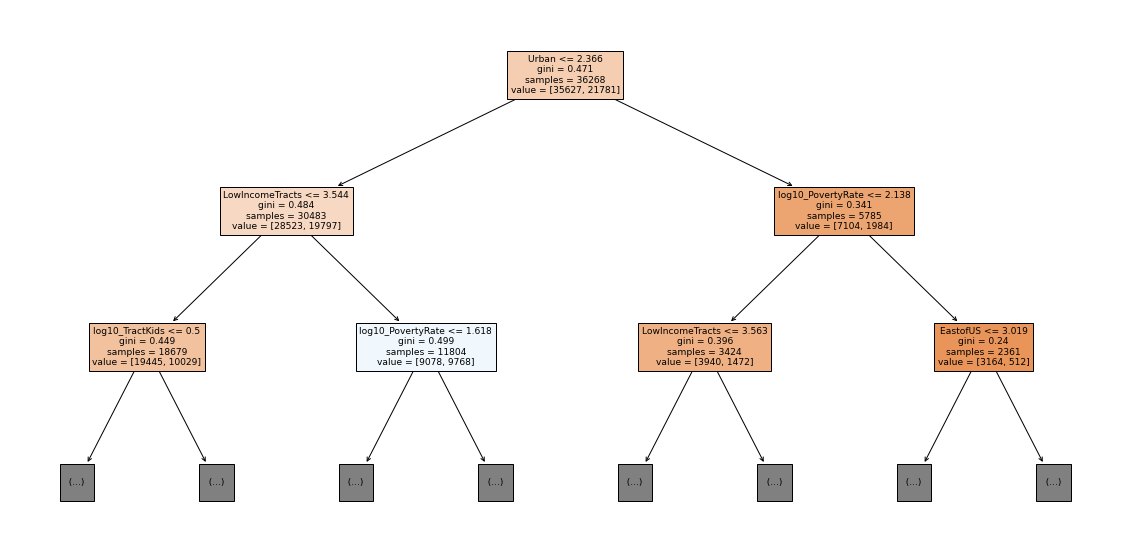

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the saved Random Forest model
random_forest_model = joblib.load('random_forest_tuned_model.pkl')

# Get one of the decision trees from the forest
tree_to_plot = random_forest_model.estimators_[56]

# Plot the tree with limited depth
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_to_plot, filled=True, feature_names=X_train.columns, max_depth=2)
plt.show()


In [76]:
from joblib import load
# Load the saved Random Forest model
random_forest_model = joblib.load('random_forest_tuned_model.pkl')

In [77]:
random_forest_model

RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=300,
                       random_state=123)

In [78]:
full_model = joblib.load('random_forest_model.pkl')
full_model

RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=300,
                       random_state=123)

In [79]:
best_params = full_model.get_params()
print("Best Parameters:")
print(best_params)

Best Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}


In [80]:
best_params = random_forest_model.get_params()
print("Best Parameters:")
print(best_params)

Best Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}
